### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
#car is mostly null so we can drop that column entirely
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
#data.drop(columns=['car']
data = data.dropna()
#drop any remaining null data from the table

4. What proportion of the total observations chose to accept the coupon? 



In [19]:
totalAccept = data['Y'].sum()
totalAccept / data.shape[0]
#roughly 57% of the people accepted the coupon

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:>

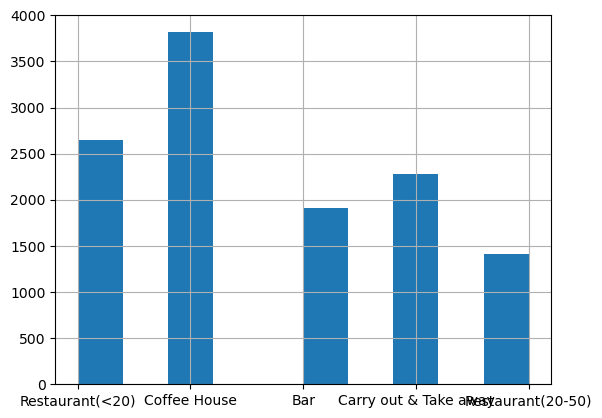

In [26]:
data['coupon'].hist(grid=True)

6. Use a histogram to visualize the temperature column.

array([55, 80, 30], dtype=int64)

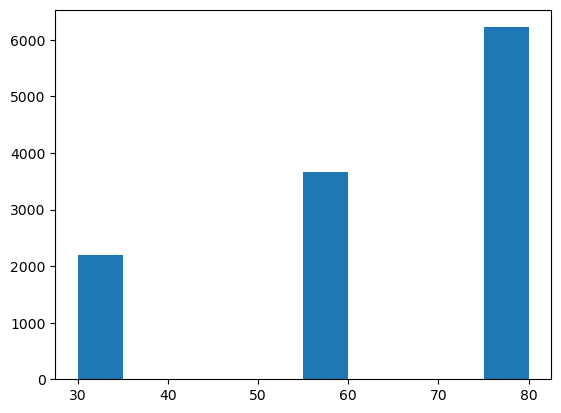

In [28]:
plt.hist(data['temperature'])
data['temperature'].unique()

In [30]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
barCouponsDf = data.loc[data['coupon'] == 'Bar']
barCouponsDf

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [33]:
barCouponsDf['Y'].sum() / barCouponsDf.shape[0]
#roughly 41.2% of the bar coupons were accepted

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [47]:
groupBar = barCouponsDf.groupby('Bar')[['Y']].sum() / barCouponsDf.shape[0]
print(groupBar)
#We can see that people who went 3 times or less per month only make up roughly 39% of the people who accepted a coupon there
#The remaining 61% is from people who frequent bars more often.

              Y
Bar            
1~3    0.128071
4~8    0.059592
gt8    0.017250
less1  0.129117
never  0.077888


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [56]:
groupOver25 = barCouponsDf.groupby('age')[['Y']].sum()/barCouponsDf.shape[0]
print(groupOver25)
#Of the people that accepted the coupons only 12% of the people that accepted a coupon for the bar were under the age of 25
#The remaining 88% were all people who are above the age 25.

                Y
age              
21       0.104548
26       0.093570
31       0.063774
36       0.031364
41       0.039205
46       0.019864
50plus   0.041819
below21  0.017773


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [76]:
acceptedPass = ['Friend(s)', 'Partner']
passDf = barCouponsDf.loc[barCouponsDf['passanger'].isin(acceptedPass)]
acceptedFreq = ['1~3', '4~8', 'gt8']
passFreqDf = passDf.loc[passDf['Bar'].isin(acceptedFreq)]
groupOccDf = passFreqDf.groupby('occupation')[['Y']].sum()/barCouponsDf.shape[0]
print(groupOccDf)
sumPercents = groupOccDf['Y'].sum()
print(sumPercents)
#Seeing that farming, fishing, and forestry had a collective 0%, this shows that the percentage of people who accepted the bar
#coupon from the group of drivers with a passanger that wasn't a kid, and frequented bars more than once a month
#was 7.06% of the total people who accepted the coupon.

                                                  Y
occupation                                         
Architecture & Engineering                 0.001568
Arts Design Entertainment Sports & Media   0.003659
Building & Grounds Cleaning & Maintenance  0.000523
Business & Financial                       0.003659
Computer & Mathematical                    0.005750
Construction & Extraction                  0.001568
Education&Training&Library                 0.001568
Food Preparation & Serving Related         0.003136
Healthcare Practitioners & Technical       0.002091
Healthcare Support                         0.001045
Installation Maintenance & Repair          0.000523
Legal                                      0.001568
Life Physical Social Science               0.000000
Management                                 0.004705
Office & Administrative Support            0.005750
Personal Care & Service                    0.000523
Production Occupations                     0.001045
Protective S

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [86]:
#data['income'].unique()
acceptedIncome = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
#data['Bar'].unique()
acceptedFreq = ['1~3', '4~8', 'gt8']
#data['passanger'].unique()
acceptedPass = ['Friend(s)', 'Partner']
#data['maritalStatus'].unique()
acceptedStatus = ['Single', 'Married partner', 'Unmarried partner', 'Divorced']
#data['age'].unique()
acceptedAge = ['below21', '21', '26']
#data['RestaurantLessThan20'].unique()
acceptedResFreq = ['4~8', 'gt8']

#create new dataframe matching conditions set
condDf = barCouponsDf.loc[((barCouponsDf['Bar'].isin(acceptedFreq)) & (barCouponsDf['passanger'].isin(acceptedPass)) & 
                         (barCouponsDf['maritalStatus'].isin(acceptedStatus))) | ((barCouponsDf['Bar'].isin(acceptedFreq)) &
                         (barCouponsDf['age'].isin(acceptedAge))) | ((barCouponsDf['RestaurantLessThan20'].isin(acceptedResFreq)) &
                         (barCouponsDf['income'].isin(acceptedIncome)))]
#get the ratio of people who fall into these categories
condDf['Y'].sum() / barCouponsDf.shape[0]
#This shows that of the people who took a bar coupon only 18.8% of them fall into these conditions.



0.18818609513852588

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
From the information and analysis, I hypothesize that the majority of drivers that accepted the bar coupons were majorly above
the age of 21, did not have children in the car with them, and either had an unmarried partner or a spouse. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [148]:
#RestaurantsLessThan20 Coupon exploration
#lets look at the different income values and how many people from each income accepted the coupon from the restaurant
data['coupon'].unique()
groupRestU20 = data.loc[data['coupon'] == 'Restaurant(<20)']
#histogram to show distribution of wealth in those that took the restaurant under 20 coupon
px.histogram(groupRestU20, x='income')

In [113]:
#check the amount of people that used the tickets in each income bracket
ratioUsedIncomes = groupRestU20.groupby('income', as_index=False)[['Y']].sum()
fig = px.bar(ratioUsedIncomes, x='income', y='Y')
fig.show()

In [147]:
#lets see the difference between the two and graph that as well
diffIncomes = groupRestU20.groupby('income', as_index=False)[['Y']].count()
groupU20Incomes = groupRestU20.groupby('income', as_index=False)[['Y']].sum()
diffIncomes['count'] = diffIncomes.Y
diffIncomes['Y'] = groupU20Incomes.Y
diffIncomes['ratioY'] = diffIncomes['Y']/diffIncomes['count']
fig2 = px.bar(diffIncomes, x='income', y='count', color='ratioY')
fig2.show()
#This shows how many drivers recieved coupons and the ratio to them recieving the coupon to them actually using it.
#As we can see, those in the income classes between $0-$62,500 were all more than 70% likely to use the coupon given to them
#However, this drops after that to roughly 65% between $62,500-$100,000 and jumps back up at $100,000 and more.
#Overall, this shows that the coupon was relatively successful among all income classes but more so in the mid range incomes.

In [168]:
#Now I want to check on a few occupations and their role in the overall picture
occupationList = ['Business & Financial', 'Management', 'Life Physical Social Science', 'Unemployed',
                 'Healthcare Practitioners & Technical', 'Healthcare Support', 'Food Preparation & Serving Related']
occDf = groupRestU20.loc[groupRestU20['occupation'].isin(occupationList)]
occTrimDf = occDf[['time', 'coupon', 'age', 'occupation', 'RestaurantLessThan20', 'destination', 'Y']]
#Let's try grouping by occupation and coloring a bar chart based on destination to get an idea of how people coming 
#off of work, to work, and people heading home behave differently to the coupons
groupOccDf = occTrimDf.groupby(['occupation', 'destination'], as_index=False)[['Y']].sum()
fig3 = px.bar(groupOccDf, x='occupation', y='Y', color='destination')
fig3.show()
#From this we can see that that unemployed people with no urgent place to be will most likely use the coupon more than other
#people from different employments. It also shows that when people are heading to work they are much less likely to use the coupon
#at all. One interesting point is the amount of unemployed people stating that their destination was work is weird.
#This can show that there is more context to be learned from the unemployed checkbox on the survey.

In [169]:
holdCountDf = occTrimDf.groupby(['occupation', 'destination'], as_index=False)[['Y']].count()
groupOccDf['count'] = holdCountDf.Y
groupOccDf['ratioY'] = groupOccDf['Y']/groupOccDf['count']
fig4 = px.bar(groupOccDf, x='occupation', y='ratioY', color='destination')
fig4.show()
#Here we have an entirely new look at the same exact data, except we ratioed the amount of people in each category, i.e.
# occupation and then destination, to the amount of people that used the coupon. Here, we can see that healthcare practioners
# have an incredibly stable chance of using the coupon no matter where they are heading. This can be used to gauge which people
# would be actually using this coupon on just a few questions. For example, are you in the Life Physical Social Science occupation
#and on your way to work? Great, we can feel safe giving them this coupon knowing 77% of people that fall in that category do
#in fact use it.